# Multiple Linear Regression, KNN ve SVM ile Makine Öğrenmesi

Bu notebook içerisinde üç tane makine ögrenmesi algoritması üzerinde durulacaktır. 
Bu algoritmalardan ilki olan Multiple Linear Regression, bir regresyon algoritması olup numerik verilerin makineler tarafından tahmin edilmesi için kullanılır. 
K-Nearest Neighbors(KNN) ve Support Vector Machine(SVM) algoritmaları ise sınıflandırma algoritmaları olup verilerin hangi sınıfa ait oldugunun makineler tarafından tahmin edilmesi için kullanılmaktadır. 
Bu algoritmaların üçü de supervised learning algoritmaları olup makinelerin tahminde bulunabilmesi için veri setleri kullanılarak egitilmesi gerekmektedir. 
Egitim isleminin gerçeklestirilebilmesi için üzerinde tahminde bulunulacak verilerin bulundugu veri setinin egitim seti (training set) ve test seti (test set) olmak üzere ikiye bölünmesi gerekmektedir. 
Bölme islemi gerçeklestirildikten sonra egitim seti kullanılarak egitilen makineler test seti üzerinde tahminlerde bulunabilecek hale gelmis olur.

## Dogrusal Regresyon Analizi

Dogrusal regresyon, bagımsız bir degiskenden bagımlı bir degiskenin degerini hesaplamak için istatistiksel bir prosedürdür.
Analiz için kullanılan teknik, bagımsız degisken sayısına baglı olarak degismektedir. Tek bir bagımsız degisken için gerçeklestirilen dogrusal regresyon analizi Simple Linear Regression teknigi ile gerçeklestirilirken, iki veya daha fazla bagımsız degisken bulundugunda Multiple Linear Regression kullanılır.

###  Multiple Linear Regression

Bir bagımlı degiskeni ve birden fazla bagımsız degiskeni bulunan regresyon modellerine Multilinear Regression denir.

y = b0 +b1x1 +b2x2 +...+bnxn

In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv("50_Startups.csv")

In [3]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


Regresyon analizleri numerik tekniklerdir ve algoritma kullanılmadan önce kategorik degerlere sahip olan Eyalet sütununun numerik veriye çevirilmesi gerekmektedir.

Kategorik degerlerin numerik degerlere dönüstürülmesi için Dummy Variables teknigi kullanılır. Bu teknik her bir kategori için farklı bir veri sütunu olu ̧sturarak veri satırının ait oldugu kategoriye denk gelen sütuna 1 degerinin ve diger kategori sütunlarına 0 degerinin verilmesi islemidir.

y = b0 +b1x1 +b2x2 +b3x3 +b4D1 +b5D2

Kategorik degisken numerik degiskenlere dönüstürüldükten sonra veri seti artık Multiple Linear Regression algoritmasını uygulamak için uygun hale gelmistir. Multiple Linear Regression emlak fiyat tahminleri, maas analizleri, yatırım kar tahminleri vs. gibi çesitli alanlarda kullanılmaktadır.

In [8]:
data["State"].unique()

array(['New York', 'California', 'Florida'], dtype=object)

#### Verilerin x ve y degiskenlerine atanması;

In [14]:
x=data.iloc[:,:4].values

In [16]:
y=data.iloc[:,4].values

#### Kategorik veri sütununun Dummy Variable’lara dönüstürülmesi;

Bu dönüsüm islemi gerçeklestirilirken Sklearn kütüphanesinin ColumnTransformer ve OneHotEncoder fonksiyonları kullanılmıstır.

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [21]:
ct=ColumnTransformer(transformers=[("encoder",OneHotEncoder(),[3])],remainder="passthrough")
X=np.array(ct.fit_transform(x))

#### Veri setinin egitim ve test seti olmak üzere ikiye bölünmesi;

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.2,random_state=0)

Burada test_size parametresi 0.2 seçilerek veri setinin %80’inin egitim için, %20’sinin ise test için ayrılması saglanmıstır.

#### Multiple Linear Regression modelinin egitim set üzerinde egitilmesi

In [27]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train, y_train) # egitim islemi saglandı

LinearRegression()

#### Test seti üzerinde tahminlerin gerçeklestirilmesi

In [28]:
y_pred=regressor.predict(X_test)
np.set_printoptions(precision=2)
np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1)

array([[103015.2 , 103282.38],
       [132582.28, 144259.4 ],
       [132447.74, 146121.95],
       [ 71976.1 ,  77798.83],
       [178537.48, 191050.39],
       [116161.24, 105008.31],
       [ 67851.69,  81229.06],
       [ 98791.73,  97483.56],
       [113969.44, 110352.25],
       [167921.07, 166187.94]])

#### Multiple Linear Regression formulündeki sabit ve katsayıların yazdırılması;

In [29]:
regressor.coef_

array([ 8.66e+01, -8.73e+02,  7.86e+02,  7.73e-01,  3.29e-02,  3.66e-02])

In [30]:
regressor.intercept_

42467.52924854249

####  Model performansının ölçümü;

Model performansı ölçülürken Sklearn kütüphanesinde “r2_score” fonksiyonu import edilerek test verisinin gerçek ve tahmin degerleri üzerinde uygulanmıstır. Sonuç olarak 0.93 degeri elde edilmistir yani algoritma verilerin %93’ünde dogru tahminde bulunmustur

In [32]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9347068473282303

## Classification

Sınıflandırma teknikleri, veriyi önceden tanımlanmıs sınıf etiketine göre sınıflandıran denetimli ögrenme teknikleridir. Regresyon analizinden farklı olarak sınıflandırma algoritmalarının sonucu numerik bir deger degil, bir sınıf bilgisidir. Sınıflandırma algoritmaları, veri seti içerisinde tanımlanmıs çesitli sınıf bilgilerinden yola çıkarak yeni veriler üzerinde tahminde bulunurlar. Bu bölümde K-Nearest Neighbor ve Support Vector Machine olmak üzere iki tane sınıflandırma algoritmasından bahsedilecek ve uygulamaları gösterilecektir.

### K-Nearest Neighbor

K-Nearest Neighbor algoritması çesitli sınıfları barındıran bir veri seti içerisinde seçilen bir noktanın veya daha sonradan eklenen bir noktanın sınıfını tahmin etmek için kullanılır. Algoritma tahmin islemini gerçeklestirmek için veri noktalarının birbirlerine olan uzaklık iliskilerinden faydalanır.Uzaklık hesaplamasına göre k adet veriyi baz alarak tahmini gerçeklestirir. Eger k veri farklı sınıflara sahipse, algoritma bilinmeyen verilerin sınıfının çogunluk sınıfıyla aynı olacagını tahmin eder

Burada “k” kullanıcı tarafından belirlenir ve bu degere göre algoritma farklı sonuçlar verebilir. Uzaklıkların hesaplanmasında yaygın olarak kullanılan tekniklerden biri Euclidean Distance’tır.

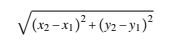

In [33]:
dataset=pd.read_csv("Social_Network_Ads.csv")

#### K-Nearest Neighbor Uygulaması

In [34]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [35]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [40]:
dataset["Purchased"].unique()

array([0, 1], dtype=int64)

Bu kısımda yaş ve gelir durumuna göre satın alınıp alınmaması durumuna bakacağız

##### Verilerin x ve y degiskenlerine atanması  ̆

In [41]:
x=dataset.iloc[:,2:4].values
y=dataset.iloc[:,-1].values

##### Veri setinin egitim ve test seti olmak üzere ikiye bölünmesi;

Burada “test_size” parametresi 0.25 seçilerek, bölme islemi sonucunda veri setinin %75’i egitim ve %25’i ise test seti olacak sekilde bölünmesi saglanmıstır.

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=0)

##### Ölçeklendirme;

Kod ile ölçeklendirme islemi gerçeklestirilerek birbirinden deger olarak çok farklı olan Age ve EstimatedSalary sütununun algoritmanın sonucunu kötü etkilememesi için aynı ölçek aralıgına getirilmesi saglanmıstır. Burada ölçeklendirme islemi için Sklearn kütüphanesinin “StandardScaler” fonksiyonu kullanılmıstır. Bu fonksiyon ile standardizasyon islemi Age ve EstimatedSalary sütunlarını barındıran X_train ve X_test degiskenleri üzerinde gerçeklestirilmistir. Bu islem ile her iki sütundaki degerler -3 ile 3 arasında olacak sekilde ölçeklendirilmistir.

In [46]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(x_train)
X_test=sc.transform(x_test)

##### K-NN modelinin egitim seti üzerinde egitilmesi;

In [47]:
from sklearn.neighbors import KNeighborsClassifier
classifier= KNeighborsClassifier(n_neighbors=5,metric="minkowski",p=2)
classifier.fit(X_train,y_train)

KNeighborsClassifier()

Sklearn kütüphanesinin “KNeighborsClassifier” fonksiyonu kullanılarak K-Nearest Neighbor modeli egitilmistir.
Burada “n_neighbors” parametresi 5 olarak seçilerek algoritmanın k degeri 5 olarak belirlenmistir. “metric” ve “p” parametrelerine ‘minkowski’ ve 2 atanarak ise uzaklık hesaplanması için Euclidean Distance’ın kullanılması saglanmıstır. Uygun parameter degerleri kullanılarak olusturulan classifier degiskeni kullanılarak “.fit()” komutu ile egitim seti üzerinden model egitilmistir.

##### Test seti üzerinde tahminlerin gerçeklestirilmesi;

In [48]:
y_pred=classifier.predict(X_test)
np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1)

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0,

##### Confusion matrix olusturulması ve performans ölçümü;

Algoritmanın verdigi sonuçlar üzerinden confusion matrix olusturulmus ve performans ölçümü gerçeklestirilmistir.
Confusion matrix’in birinci satırında görüldügü üzere algoritma gerçekte sınıf degeri 0 olan verilerin 64’ünün dogru 4’ünün ise yanlıs tahmin edildigi görülmektedir. Aynı  ̧sekilde ikinci satırda sınıf degeri 1 olan verilerin 29’unun dogru 3’ünün ise yanlıs tahmin edildigi görülmektedir.

In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,y_pred)
cm

array([[64,  4],
       [ 3, 29]], dtype=int64)

In [51]:
accuracy_score(y_test,y_pred)

0.93

Accuracy_score fonksiyonu ile hesaplanan performans degerine bakıldıgında ise 0.93 yani %93 oranla algoritmanın dogru tahminde bulundugu görülmektedir.

### Support Vector Machine

Support Vector Machine, regresyon analizi için de kullanılabilir fakat bu bölümde sadece sınıflandırma için bilgi verilecektir. SVM’ler, "parametrik olmayan" modellerdir. Support Vector Machine, veri seti içerisindeki sınıfları birbirine esit uzaklıkla bölen bir vektör bulmaya yarar. Her sınıfın bu vektöre en yakın olan veri noktalarına Support Vector denir. Veri uzayında sınıfları birbirinden ayırmak için sonsuz vektör çizilebilir fakat algoritma bu vektörü Support Vector’lerin vektöre olan uzaklıgı maksimum olacak ̧sekilde bulmaya çalısır.

Eger algoritmadan kendisine verilen elma ve portakal görsellerini sınıflandırması istedigimizi varsayarsak, buradaki Support Vector’ler alısılmısın dısında yada degisik özelliklere sahip elmalar ve portakallara karsılık gelirken vektörlere en uzak noktalardaki veriler standard elma ve portakal özelliklerine sahip verilere karsılık gelmektedir. Bu özelligi sayesinde algoritma gayet basarılı bir sınıflandırma ortaya koymaktadır. SVM, parametre uzayında linear bir sınıflandırıcıdır, ancak linear olmayan bir sınıflandırıcıya kolayca genisletilebilir.

##### Support Vector Machine Uygulaması

In [60]:
x=dataset.iloc[:,2:4].values
y=dataset.iloc[:,-1].values #Verilerin x ve y degiskenlerine atanması

In [61]:
from sklearn.model_selection import train_test_split #Veri setinin egitim ve test seti olmak üzere ikiye bölünmesi
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [62]:
from sklearn.preprocessing import StandardScaler #Ölçeklendirme
sc=StandardScaler()
X_train=sc.fit_transform(x_train)
X_test=sc.transform(x_test)

##### SVM modelinin egitim seti üzerinde egitilmesi;

Bu kısımda algoritma hem linear bir sınıflandırma yapması için hem de kernel fonksiyonu kullanılarak linear olmayan bir sınıflandırma yapması için iki farklı  ̧sekilde egitilip uygulumanın devamında her iki durum için de sonuçlar verilmistir.

Sklearn kütüphanesinin SVC fonksiyonu kullanılarak Linear Support Vector Machine modeli egitilmistir. Burada “kernel” parametresi ‘linear’ seçilerek algoritmanın linear bir sınıflandırma yapması saglanmıstır.

In [65]:
from sklearn.svm import SVC
classifier=SVC(kernel="linear",random_state=0)
classifier.fit(X_train,y_train)

SVC(kernel='linear', random_state=0)

Model tanımlanırken “kernel” parametresi ‘rbf’ olarak tanımlanarak algoritmanın linear olmayan bir sınıflandırma yapması saglanabilir.

##### Test seti üzerinde tahminlerin gerçeklestirilmesi;

In [66]:
from sklearn.svm import SVC
classifier_=SVC(kernel="rbf",random_state=0)
classifier_.fit(X_train,y_train)

SVC(random_state=0)

In [67]:
y_pred=classifier.predict(X_test)

In [68]:
y_pred_=classifier_.predict(X_test)

Test seti üzerinde tahminlerin gerçeklestirilmesi

##### Confusion matrix olusturulması ve performans ölçümü;

In [69]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
cm

array([[66,  2],
       [ 8, 24]], dtype=int64)

In [70]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm_=confusion_matrix(y_test,y_pred_)
cm

array([[66,  2],
       [ 8, 24]], dtype=int64)

In [71]:
accuracy_score(y_test,y_pred)

0.9

In [72]:
accuracy_score(y_test,y_pred_)

0.93

Linear SVM sınıf degeri 0 olan verilerin 66’sını dogru 2’sini ise yanlıs tahmin etmistir. Sınıf degeri 1 olanların ise 24’ünü dogru 8’ini yanlıs tahmin etmistir. Toplamda ise %90 isabet ile dogru tahminde bulunmustur.

Kernel SVM sınıf degeri 0 olan verilerin 64’ünü dogru 4’ünü ise yanlıs tahmin etmistir. Sınıf degeri 1 olanların ise 29’unu dogru 3’ünü yanlıs tahmin etmistir. Toplamda ise %93 isabet ile dogru tahminde bulunmustur.